# Options - Greeks

---

## Motivation

Options give you a payoff at expiry, but their price changes all the time before expiry as the underlying moves, time passes, and volatility shifts. The payoff diagrams you have already seen show what happens at the end of the option’s life. The Greeks describe how the option’s price reacts along the way.

This notebook introduces the main Greeks for a simple European call option in the Black–Scholes framework and visualises how they behave as the underlying price changes. In particular we focus on the intitution that can be gleamed from the formulae, rather than focusing on the derivation of said formulae.

We settle our focus on these quantities:

- Delta: sensitivity of the option price to the underlying price.
- Gamma: sensitivity of delta to the underlying price (curvature).
- Theta: sensitivity of the option price to the passage of time.
- Vega: sensitivity of the option price to (implied) volatility.
- "Vol of Vol", Volga or Vomma: sensitivty of vega to (implied) volatility.

Recall that in the Black–Scholes model, a European call with underlying price $S$, strike $K$, maturity $T$, risk‑free rate $r$, and volatility $\sigma$ has price

$$
C(S,K,T,r,\sigma) = S\,\Phi(d_1) - K e^{-rT} \,\Phi(d_2),
$$
where
$$
d_1 = \frac{\ln\!\bigl(S/K\bigr) + \left(r + \tfrac{1}{2}\sigma^2\right)T}{\sigma\sqrt{T}}
\qquad
d_2 = d_1 - \sigma\sqrt{T}
$$
and $\Phi$ is the standard normal CDF and $\phi$ its PDF:
$$
\phi(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

## Delta

Delta measures how the option price reacts to small moves in the underlying. For a call with price $C(S)$, it is defined as
$$
\Delta = \frac{\partial C}{\partial S}
$$
so for a small move of the underlying from $S$ to $S + \mathrm{d}S$ the price change is approximately
$$
\mathrm{d}C \approx \Delta\,\mathrm{d}S
$$
This means that if $\Delta = 0.4$ and the stock moves up by 1 (for a small move), the option price is expected to move up by about $0.4$.

You can understand the size of $\Delta$ from the payoff:
* Deep out of the money, the payoff at maturity is almost always $0$, so small changes in $S$ barely affect the chance of ending in the money; the option price hardly reacts and $\Delta \approx 0$. 
* Deep in the money, the payoff is almost always $S_T - K$, which behaves like holding the stock and subtracting a fixed constant, so small changes in $S$ are transmitted almost one‑for‑one to the option value and $\Delta \approx 1$. 
* Around at‑the‑money, the option sometimes finishes in the money and sometimes not, so it behaves partly like stock and partly like a binary bet, and $\Delta$ tends to sit somewhere in between, often around $0.5$.

The same number $\Delta$ is also the hedge ratio: it tells you how many shares to hold per option to neutralize small price moves. If you are short 1 call with $\Delta = 0.6$, you buy $0.6$ shares of the underlying. For a small move in $S$ the change in the combined position
$$
\mathrm{d}\Pi = \mathrm{d}C - \Delta\,\mathrm{d}S
$$
is then close to $0$, so the portfolio is (locally) insensitive to $S$. In the Black–Scholes model this optimal hedge ratio works out to
$$
\Delta = \Phi(d_1),
$$
so $\Phi(d_1)$ is exactly “how many shares one call behaves like” in the replicating strategy.


## Gamma

Gamma measures how quickly delta changes when the underlying price moves. For a call with price $C(S)$ and delta $\Delta(S)$, gamma is
$$
\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{\partial \Delta}{\partial S}.
$$

Where delta is the slope of the option price with respect to $S$, gamma is the curvature: it tells you how much that slope itself will change after a small move in $S$.

If gamma is close to zero, the option price is almost a straight line in $S$ over small ranges, so delta is fairly stable and a delta hedge does not need frequent rebalancing. If gamma is large and positive, the price curve is strongly convex: delta jumps quickly as $S$ moves, so any delta hedge will go out of date fast and needs frequent adjustment as the market moves.

For a vanilla call in Black–Scholes, gamma is largest when the option is near at‑the‑money and close to expiry, and small when it is deep in‑ or out‑of‑the‑money or very long‑dated. Intuitively, around the strike and near maturity, a tiny move in $S$ can flip the option from “likely worthless” to “likely exercised” (or vice versa), so the option’s stock‑like behavior (its delta) changes very rapidly there; that is precisely what high $\Gamma$ is capturing.

From a hedging point of view, gamma drives how much P\&L you make or lose from the underlying bouncing around while you are delta‑hedged. With $\Gamma > 0$ (long options), a delta‑hedged position tends to gain from volatility because the convex payoff lets the option value outperform the linear stock hedge. With $\Gamma < 0$ (short options), the same volatility tends to hurt you: each time the underlying moves, delta shifts against you and you must rebalance the hedge, "buying high and selling low," which turns curvature into losses.


## Theta

Theta measures how the option price changes as time passes, with the underlying price and volatility held fixed. For a call with price $C(T)$ (as a function of time to maturity $T$), theta is
$$
\Theta = \frac{\partial C}{\partial T}.
$$
In practice one usually looks at the effect “per day” or “per small step in calendar time,” and for a long call this number is typically negative: as expiry gets closer, there is less time for a big favorable move to happen, so the option’s time value steadily decays.

A useful way to think about this is that an option’s value is tied to “how much future it has left.” You can view the price as the average (risk‑neutral) payoff over all the paths the stock could still take. With lots of time remaining, there are many paths where the stock ends up far in your favor, so the option carries a lot of extra value above intrinsic. As expiry approaches, you are cutting off future paths: every day that passes is one less day for a big move to rescue a currently bad position, so the expected payoff shrinks even if today’s $S$ and $\sigma$ do not change. Theta is exactly this rate of shrinkage with respect to time.

Far from expiration, there is plenty of time for large moves, so the time value component is high and the option loses value slowly; $|\Theta|$ is small and time decay is gentle. Closer to expiration, especially for at‑the‑money options, a small amount of remaining time makes a big difference to the chance of ending in the money, so the remaining time value erodes rapidly; $|\Theta|$ becomes large and time decay accelerates. Deep in‑the‑money options retain a lot of intrinsic value and behave more like stock, so their price is less sensitive to time passing (theta closer to zero), while deep out‑of‑the‑money options can quickly “collapse” toward zero as it becomes clear they are unlikely to finish in the money.

From a P\&L perspective, theta is the “rent” you pay as an option buyer for the right to optionality over time. If you are long options, you typically have negative theta and lose money each day from time decay unless the underlying or volatility moves in your favor enough to offset it. If you are short options, you typically have positive theta and collect this decay as profit, as long as adverse price or volatility moves do not overwhelm the steady gain from the passage of time. A quoted theta of, say, $-0.10$ means: if nothing else changes, the option is expected to be worth about $0.10$ less tomorrow than today purely because there is one day less for something good to happen.


## Vega

Vega measures how much the option price changes when volatility changes, holding the underlying price and time fixed. For a call with price $C(\sigma)$ as a function of volatility $\sigma$, vega is
$$
\text{Vega} = \frac{\partial C}{\partial \sigma}.
$$
In the Black–Scholes model for a call,
$$
\text{Vega} = S\,\phi(d_1)\,\sqrt{T},
$$
so increasing $\sigma$ increases $C$ if you are long the option. In trading, vega is usually quoted “per vol point”: if a call has vega $0.20$, then a 1 percentage‑point change in implied volatility (for example from $20\%$ to $21\%$) changes the option price by about $0.20$.

The intuition is that volatility controls how widely future stock prices can fan out. Higher volatility makes the distribution of future $S_T$ wider: there is more probability of very high prices and very low prices. A call benefits from this because its payoff keeps the upside but truncates the downside at zero, so more dispersion generally increases the *average* payoff and therefore the option price. Lower volatility compresses the distribution of $S_T$ around today’s level, reducing the chance of large favorable moves and thus reducing the option’s time value.

From a risk perspective, long calls and long puts have positive vega: they gain when implied volatility rises and lose when it falls. Short options have negative vega: they benefit from volatility coming down but are hurt when volatility expands. For a given maturity, vega is typically largest for near at‑the‑money options (where shifting probability mass into the wings has the biggest effect on expected payoff) and smaller for deep in‑ or out‑of‑the‑money options, where changes in volatility have little impact on the likelihood of a meaningful payoff.


## Volga (vol of vol)

Volga measures the curvature of the option price with respect to volatility.
$$
\text{Volga} = \frac{\partial^2 C}{\partial \sigma^2}
             = \frac{\partial\,\text{Vega}}{\partial \sigma}.
$$
Where vega tells you “how much does the option price move if implied vol moves a little,” volga tells you “how quickly does that vega itself change if implied vol keeps moving,” i.e. the curvature of the price-volatility relationship.

In the Black–Scholes model for a vanilla option, vega is largest for near at‑the‑money options with moderate to long time to expiry, and it falls off as the option becomes very deep in or out‑of‑the‑money or as expiry approaches. Volga describes how this vega peak shifts as you change $\sigma$: options in regions where vega is very sensitive to $\sigma$ have large $|\text{Volga}|$, meaning their volatility risk profile can change sharply when implied vol moves. Traders use volga (together with vega and the cross‑Greek vanna) to understand and manage the higher‑order effects of moves in the volatility surface, especially for books that are notionally vega‑neutral but still exposed to changes in the *shape* and *level* of implied volatility.


## Numerical Example

We work with a European call option under the Black–Scholes model and define price and Greeks as functions of the current underlying price $S$.

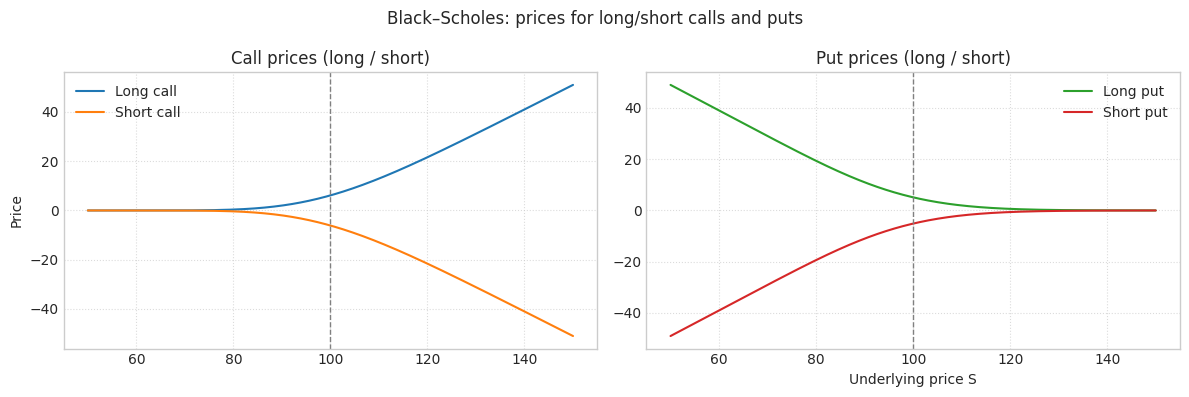

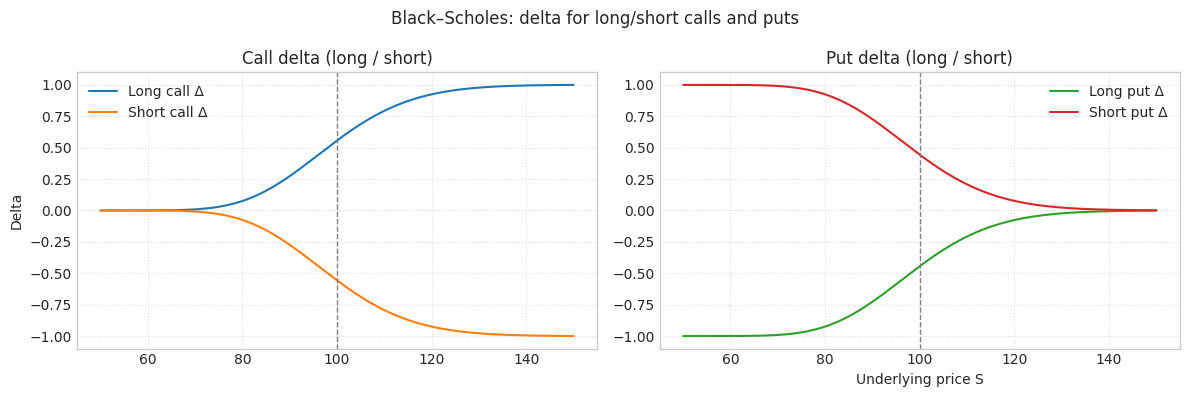

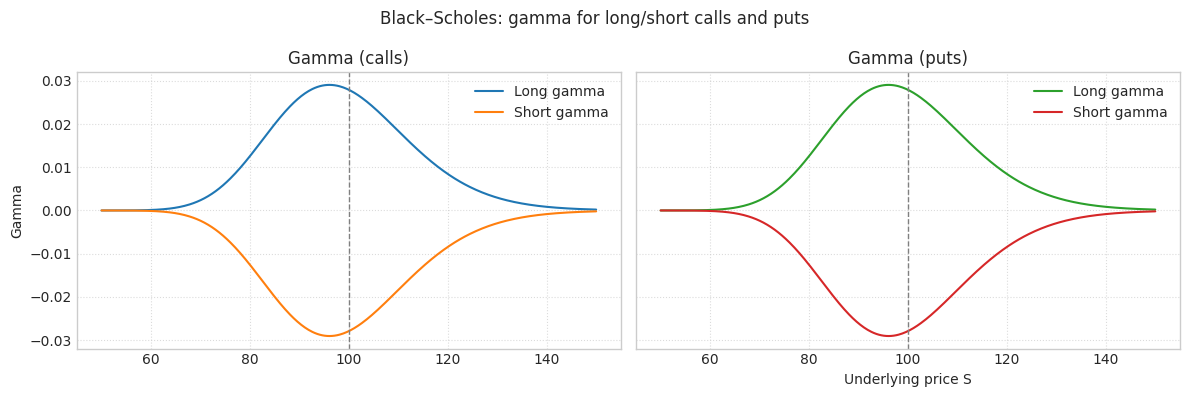

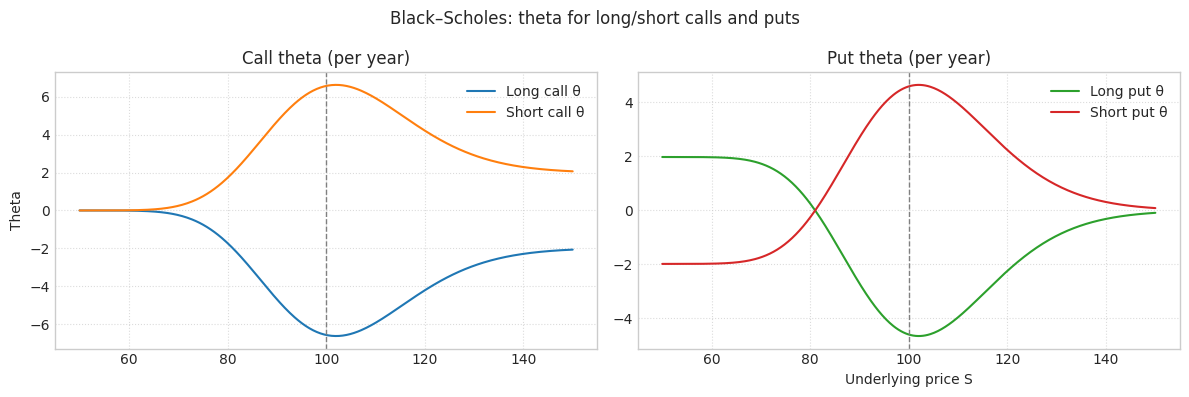

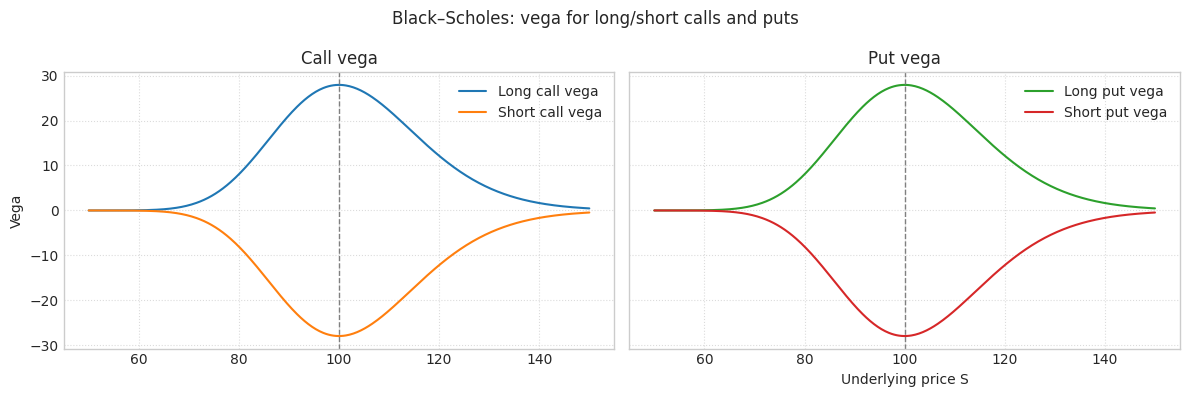

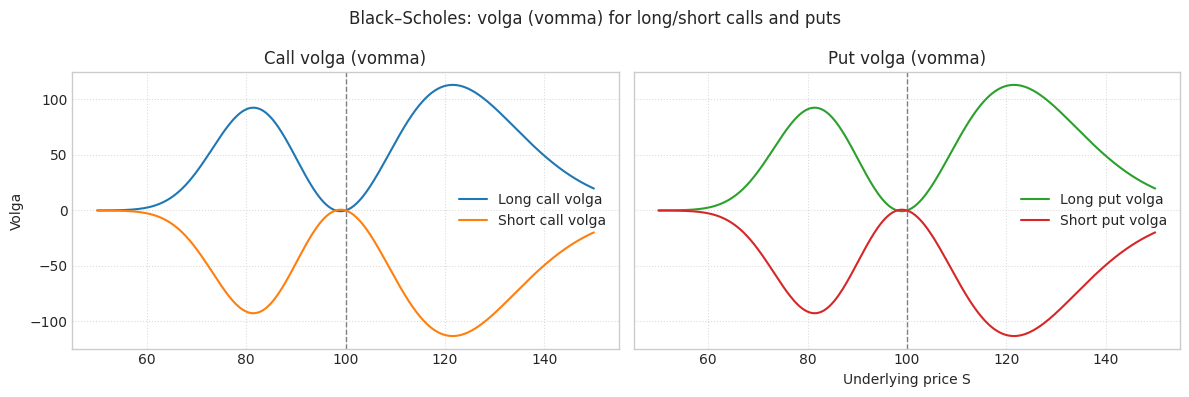

In [ ]:
from math import erf  # scalar, wrapped with np.vectorize

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

# ================== Normal CDF / PDF ==================


def _norm_cdf_scalar(x):
    return 0.5 * (1.0 + erf(x / np.sqrt(2.0)))


norm_cdf = np.vectorize(_norm_cdf_scalar)


def norm_pdf(x):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * x * x)


# ================== Black–Scholes core ==================


def _d1_d2(S, K, T, r, sigma):
    S = np.asarray(S, dtype=float)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2


def bs_call_price(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return np.maximum(np.asarray(S, float) - K, 0.0)
    d1, d2 = _d1_d2(S, K, T, r, sigma)
    return S * norm_cdf(d1) - K * np.exp(-r * T) * norm_cdf(d2)


def bs_put_price(S, K, T, r, sigma):
    # Put–call parity
    return bs_call_price(S, K, T, r, sigma) - S + K * np.exp(-r * T)


# ================== Greeks (per option) ==================


def bs_call_delta(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        S = np.asarray(S, float)
        return np.where(S > K, 1.0, 0.0)
    d1, _ = _d1_d2(S, K, T, r, sigma)
    return norm_cdf(d1)


def bs_put_delta(S, K, T, r, sigma):
    # Δ_put = Δ_call - 1
    return bs_call_delta(S, K, T, r, sigma) - 1.0


def bs_gamma(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return np.zeros_like(S, float)
    d1, _ = _d1_d2(S, K, T, r, sigma)
    return norm_pdf(d1) / (S * sigma * np.sqrt(T))


def bs_call_theta(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return np.zeros_like(S, float)
    d1, d2 = _d1_d2(S, K, T, r, sigma)
    term1 = -(S * norm_pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm_cdf(d2)
    return term1 + term2  # per year


def bs_put_theta(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return np.zeros_like(S, float)
    d1, d2 = _d1_d2(S, K, T, r, sigma)
    term1 = -(S * norm_pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = +r * K * np.exp(-r * T) * (1.0 - norm_cdf(d2))
    return term1 + term2  # per year


def bs_vega(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return np.zeros_like(S, float)
    d1, _ = _d1_d2(S, K, T, r, sigma)
    return S * norm_pdf(d1) * np.sqrt(T)  # per 1.0 change in sigma


def bs_volga(S, K, T, r, sigma):
    # Volga (vomma) = d^2C / d sigma^2 = vega * d1 * d2 / sigma
    if T <= 0 or sigma <= 0:
        return np.zeros_like(S, float)
    d1, d2 = _d1_d2(S, K, T, r, sigma)
    vega = bs_vega(S, K, T, r, sigma)
    return vega * d1 * d2 / sigma


# ================== Parameters ==================

K = 100.0
r = 0.02
sigma = 0.20
T = 0.5

S = np.linspace(50, 150, 400)

# ================== Prices ==================

call_long = bs_call_price(S, K, T, r, sigma)
put_long = bs_put_price(S, K, T, r, sigma)

call_short = -call_long
put_short = -put_long

# ================== Greeks (long / short) ==================

delta_c_l = bs_call_delta(S, K, T, r, sigma)
delta_p_l = bs_put_delta(S, K, T, r, sigma)
gamma_l = bs_gamma(S, K, T, r, sigma)
theta_c_l = bs_call_theta(S, K, T, r, sigma)
theta_p_l = bs_put_theta(S, K, T, r, sigma)
vega_l = bs_vega(S, K, T, r, sigma)
volga_l = bs_volga(S, K, T, r, sigma)

delta_c_s = -delta_c_l
delta_p_s = -delta_p_l
gamma_s = -gamma_l
theta_c_s = -theta_c_l
theta_p_s = -theta_p_l
vega_s = -vega_l
volga_s = -volga_l

# ================== Payoffs at expiry ==================

S_T = S
call_long_payoff = np.maximum(S_T - K, 0.0)
call_short_payoff = -call_long_payoff
put_long_payoff = np.maximum(K - S_T, 0.0)
put_short_payoff = -put_long_payoff

# ================== Plot helpers ==================


def vline_strike(ax):
    ax.axvline(K, color="gray", linestyle="--", linewidth=1)


# ================== 1) Prices and payoffs ==================

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].plot(S, call_long, label="Long call price", color="tab:blue")
axes[0].plot(
    S_T, call_long_payoff, label="Long call payoff", color="tab:blue", linestyle="--"
)
axes[0].plot(S, call_short, label="Short call price", color="tab:orange")
axes[0].plot(
    S_T,
    call_short_payoff,
    label="Short call payoff",
    color="tab:orange",
    linestyle="--",
)
axes[0].set_title("Calls: price today vs payoff at expiry")
axes[0].set_ylabel("Value")
vline_strike(axes[0])
axes[0].legend()

axes[1].plot(S, put_long, label="Long put price", color="tab:green")
axes[1].plot(
    S_T, put_long_payoff, label="Long put payoff", color="tab:green", linestyle="--"
)
axes[1].plot(S, put_short, label="Short put price", color="tab:red")
axes[1].plot(
    S_T, put_short_payoff, label="Short put payoff", color="tab:red", linestyle="--"
)
axes[1].set_title("Puts: price today vs payoff at expiry")
axes[1].set_xlabel("Underlying price")
vline_strike(axes[1])
axes[1].legend()

for ax in axes.ravel():
    ax.grid(True, linestyle=":", alpha=0.7)

fig.suptitle("Black–Scholes: prices and payoffs (long / short calls and puts)", y=0.98)
plt.tight_layout()
plt.show()

# ================== 2) Delta ==================

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].plot(S, delta_c_l, label="Long call Δ", color="tab:blue")
axes[0].plot(S, delta_c_s, label="Short call Δ", color="tab:orange")
axes[0].set_title("Call delta")
axes[0].set_ylabel("Delta")
vline_strike(axes[0])
axes[0].legend()

axes[1].plot(S, delta_p_l, label="Long put Δ", color="tab:green")
axes[1].plot(S, delta_p_s, label="Short put Δ", color="tab:red")
axes[1].set_title("Put delta")
axes[1].set_xlabel("Underlying price")
vline_strike(axes[1])
axes[1].legend()

for ax in axes.ravel():
    ax.grid(True, linestyle=":", alpha=0.7)

fig.suptitle("Delta for long / short calls and puts", y=0.98)
plt.tight_layout()
plt.show()

# ================== 3) Gamma ==================

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

axes[0].plot(S, gamma_l, label="Long gamma", color="tab:blue")
axes[0].plot(S, gamma_s, label="Short gamma", color="tab:orange")
axes[0].set_title("Gamma (calls)")
axes[0].set_ylabel("Gamma")
vline_strike(axes[0])
axes[0].legend()

axes[1].plot(S, gamma_l, label="Long gamma", color="tab:green")
axes[1].plot(S, gamma_s, label="Short gamma", color="tab:red")
axes[1].set_title("Gamma (puts)")
axes[1].set_xlabel("Underlying price")
vline_strike(axes[1])
axes[1].legend()

for ax in axes.ravel():
    ax.grid(True, linestyle=":", alpha=0.7)

fig.suptitle("Gamma for long / short calls and puts", y=0.98)
plt.tight_layout()
plt.show()

# ================== 4) Theta ==================

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

axes[0].plot(S, theta_c_l, label="Long call θ", color="tab:blue")
axes[0].plot(S, theta_c_s, label="Short call θ", color="tab:orange")
axes[0].set_title("Call theta (per year)")
axes[0].set_ylabel("Theta")
vline_strike(axes[0])
axes[0].legend()

axes[1].plot(S, theta_p_l, label="Long put θ", color="tab:green")
axes[1].plot(S, theta_p_s, label="Short put θ", color="tab:red")
axes[1].set_title("Put theta (per year)")
axes[1].set_xlabel("Underlying price")
vline_strike(axes[1])
axes[1].legend()

for ax in axes.ravel():
    ax.grid(True, linestyle=":", alpha=0.7)

fig.suptitle("Theta for long / short calls and puts", y=0.98)
plt.tight_layout()
plt.show()

# ================== 5) Vega ==================

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

axes[0].plot(S, vega_l, label="Long call vega", color="tab:blue")
axes[0].plot(S, vega_s, label="Short call vega", color="tab:orange")
axes[0].set_title("Call vega")
axes[0].set_ylabel("Vega")
vline_strike(axes[0])
axes[0].legend()

axes[1].plot(S, vega_l, label="Long put vega", color="tab:green")
axes[1].plot(S, vega_s, label="Short put vega", color="tab:red")
axes[1].set_title("Put vega")
axes[1].set_xlabel("Underlying price")
vline_strike(axes[1])
axes[1].legend()

for ax in axes.ravel():
    ax.grid(True, linestyle=":", alpha=0.7)

fig.suptitle("Vega for long / short calls and puts", y=0.98)
plt.tight_layout()
plt.show()

# ================== 6) Volga ==================

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

axes[0].plot(S, volga_l, label="Long call volga", color="tab:blue")
axes[0].plot(S, volga_s, label="Short call volga", color="tab:orange")
axes[0].set_title("Call volga (vomma)")
axes[0].set_ylabel("Volga")
vline_strike(axes[0])
axes[0].legend()

axes[1].plot(S, volga_l, label="Long put volga", color="tab:green")
axes[1].plot(S, volga_s, label="Short put volga", color="tab:red")
axes[1].set_title("Put volga (vomma)")
axes[1].set_xlabel("Underlying price")
vline_strike(axes[1])
axes[1].legend()

for ax in axes.ravel():
    ax.grid(True, linestyle=":", alpha=0.7)

fig.suptitle("Volga (vomma) for long / short calls and puts", y=0.98)
plt.tight_layout()
plt.show()